# 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [2]:
# # 구글 colab 사용시
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# cd /content/drive/MyDrive/Colab_Notebooks

In [4]:
# set seed
np.random.seed(42) 

In [5]:
# 데이터셋 불러오기
df = pd.read_csv('./실전db.csv')
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [6]:
# 컬럼명 소문자로 변환
df= df.rename(columns=str.lower)
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [7]:
# 컬럼별 dtype 수정
df[['join_date', 'date']] = df[['join_date', 'date']].apply(lambda X : pd.to_datetime(X))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     879271 non-null  int64         
 1   join_date   879271 non-null  datetime64[ns]
 2   d_type      879271 non-null  object        
 3   store_id    879271 non-null  int64         
 4   goods_type  879271 non-null  object        
 5   date        879271 non-null  datetime64[ns]
 6   count       879271 non-null  int64         
 7   ad1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 53.7+ MB


In [8]:
# 데이터 요약
df.describe()

,user_id,store_id,count
count,8.792710e+05,879271.000000,879271.000000
mean,1.206566e+06,149599.960642,1.029079
std,4.206529e+05,68898.035318,0.512428
min,2.240000e+02,4.000000,1.000000
25%,9.005760e+05,92437.000000,1.000000
50%,1.321440e+06,173059.000000,1.000000
75%,1.542416e+06,220661.000000,1.000000
max,1.830598e+06,231465.000000,61.000000


In [9]:
df.describe(include = 'O')

,d_type,goods_type,ad1
count,879271,879271,879271
unique,3,4,85
top,AA,A,J
freq,493166,609790,179383


In [10]:
for col in df.columns:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].nunique()}")
    print()

Column명: user_id
Unique값: 165425

Column명: join_date
Unique값: 2352

Column명: d_type
Unique값: 3

Column명: store_id
Unique값: 1061

Column명: goods_type
Unique값: 4

Column명: date
Unique값: 366

Column명: count
Unique값: 56

Column명: ad1
Unique값: 85



In [11]:
for col in df[['d_type', 'goods_type', 'ad1']]:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].unique()}")
    print()

Column명: d_type
Unique값: ['AA' 'BB' 'CC']

Column명: goods_type
Unique값: ['A' 'C' 'B' 'D']

Column명: ad1
Unique값: ['GN' 'J' 'SC' 'MP' 'JRR' 'YD' 'GJ' 'YO' 'GSN' 'GBC' 'BF' 'DJ' '0' 'CD'
 'NO' 'CY' 'YC' 'SD' 'GD' 'GSW' 'DM' 'R' 'GB' 'GS' 'GHN' 'SB' 'IND' 'P'
 'GW' 'JR' 'GEJ' 'GGY' 'GKP' 'CAS' 'SG' 'BJG' 'BHW' 'GAY' 'GYI' 'CCA'
 'PJP' 'GGC' 'IYS' 'DB' 'GGM' 'GAS' 'WOID' 'DIV' 'AOI' 'COI' 'GPJ' 'SOI'
 'ABP' 'DOI' 'WF' 'BI' 'ZP' 'EP' 'Q' 'BO' 'ZE' 'RRR' 'QGI' 'DSO' 'SOD'
 'BOI' 'WT' 'BP' 'SP' 'CN' 'SJV' 'SDU' 'QH' 'BUD' 'CU' 'VU' 'WAE' 'NW'
 'DY' 'WH' 'GR' 'X' 'CVB' 'ADS' 'VO']



In [12]:
# 결측치 확인
df.isnull().sum()

user_id       0
join_date     0
d_type        0
store_id      0
goods_type    0
date          0
count         0
ad1           0
dtype: int64

# 필요 컬럼 추가

In [13]:
df['join_yearmonth'] = df['join_date'].dt.strftime('%Y-%m')
df['pay_yearmonth'] = df['date'].dt.strftime('%Y-%m')
df['pay_dow'] = df['date'].dt.day_name()
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014-01,2020-01,Wednesday
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-02,2020-01,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2020-01,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2020-01,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2020-01,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020-12,2020-12,Thursday
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020-12,2020-12,Thursday
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020-12,2020-12,Thursday
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020-12,2020-12,Thursday


# 컬럼별 EDA

## user_id(유저) 기준

In [14]:
# user_id 999665의 연간 결제횟수 7919건
df_user = df.groupby('user_id')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
df_user

,user_id,count
44115,999665,7919
100781,1514190,284
16448,591610,245
90227,1467323,239
76230,1355841,235
...,...,...
45671,1023974,1
110166,1551355,1
45674,1024027,1
45676,1024047,1


In [15]:
# 매일 사용내역이 여러건 조회됨. 직원 공용 아이디인지?
df[df['user_id']==999665]

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR,2018-12,2020-01,Wednesday
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN,2018-12,2020-01,Thursday
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC,2018-12,2020-01,Friday
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP,2018-12,2020-01,Saturday
6919,999665,2018-12-16,CC,104916,A,2020-01-05,14,GN,2018-12,2020-01,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,CC,2428,A,2020-12-27,17,CY,2018-12,2020-12,Sunday
868847,999665,2018-12-16,CC,109267,A,2020-12-28,24,J,2018-12,2020-12,Monday
871562,999665,2018-12-16,CC,90193,C,2020-12-29,23,GW,2018-12,2020-12,Tuesday
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS,2018-12,2020-12,Wednesday


In [16]:
# 이상치로 판단하여 제거하고 진행
df = df[df['user_id'] != 999665]
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014-01,2020-01,Wednesday
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-02,2020-01,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2020-01,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2020-01,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2020-01,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020-12,2020-12,Thursday
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020-12,2020-12,Thursday
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020-12,2020-12,Thursday
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020-12,2020-12,Thursday


In [17]:
df_user = df.groupby('user_id')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
df_user

,user_id,count
100780,1514190,284
16448,591610,245
90226,1467323,239
76229,1355841,235
62808,1224426,223
...,...,...
81384,1402020,1
81383,1402008,1
81382,1401999,1
81379,1401974,1


<AxesSubplot:>

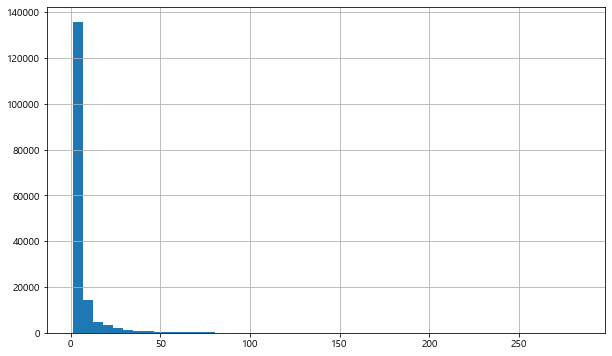

In [18]:
df_user['count'].hist(bins = 50, figsize=(10,6))

In [19]:
df_user[df_user['count']==1]

,user_id,count
164292,1820269,1
157303,1773327,1
164212,1819760,1
157021,1771732,1
156988,1771579,1
...,...,...
81384,1402020,1
81383,1402008,1
81382,1401999,1
81379,1401974,1


In [20]:
# 전체 유저의 44.7%는 사용 이력이 1회
len(df_user.loc[df_user['count']==1, 'user_id'].to_list()) / df_user.shape[0] * 100

44.701494341812555

## join_date(가입일) 기준

In [21]:
# 가입일이 1970-01-01인 데이터 1093건
df_join_date = df.groupby('join_date')['count'].agg(['count','sum']).reset_index()
df_join_date

,join_date,count,sum
0,1970-01-01,1093,1119
1,2013-12-16,2,2
2,2013-12-17,26,27
3,2013-12-18,1,1
4,2013-12-21,2,2
...,...,...,...
2347,2020-12-27,102,105
2348,2020-12-28,135,140
2349,2020-12-29,115,117
2350,2020-12-30,106,108


In [22]:
# user_id가 join_date 순서로 부여되었는지 확인
df_join_order = df.groupby('user_id')['join_date', 'count'].agg({'join_date' : 'min',
                                                                 'count' : 'sum'}).reset_index().sort_values(by = 'user_id')
df_join_order

<ipython-input-22-822f6a27cb88>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_join_order = df.groupby('user_id')['join_date', 'count'].agg({'join_date' : 'min',


,user_id,join_date,count
0,224,2013-12-16,2
1,232,2013-12-17,24
2,342,2013-12-17,1
3,565,2013-12-17,2
4,729,2013-12-18,1
...,...,...,...
165419,1830551,2020-12-31,1
165420,1830570,2020-12-31,1
165421,1830580,2020-12-31,1
165422,1830589,2020-12-31,1


In [23]:
# user_id는 join_date 순으로 부여되었음 (user_id가 작을수록 먼저 가입한 유저)
# join_date이 1970-01-01로 들어가있는 경우는 직전 유저 가입일로 임의 대체
check_1970 = 0
check_others = 0

for i in range(0, df_join_order.shape[0]):
    try:
        if (df_join_order.loc[i,'join_date'] - df_join_order.loc[i+1, 'join_date']).days > 0:
            if str(df_join_order.loc[i+1, 'join_date'] == '1970-01-01 00:00:00'):
                check_1970 += 1
                df_join_order.loc[i+1, 'join_date'] = df_join_order.loc[i,'join_date']
                
            else:
                check_others += 1
    except:
        pass

check_1970, check_others

(264, 0)

In [24]:
# 대체완료 확인
df_join_order[df_join_order['join_date']=='1970-01-01']

,user_id,join_date,count


In [25]:
df_join_order['join_yearmonth'] = df_join_order['join_date'].dt.strftime('%Y-%m')
df_join_order

,user_id,join_date,count,join_yearmonth
0,224,2013-12-16,2,2013-12
1,232,2013-12-17,24,2013-12
2,342,2013-12-17,1,2013-12
3,565,2013-12-17,2,2013-12
4,729,2013-12-18,1,2013-12
...,...,...,...,...
165419,1830551,2020-12-31,1,2020-12
165420,1830570,2020-12-31,1,2020-12
165421,1830580,2020-12-31,1,2020-12
165422,1830589,2020-12-31,1,2020-12


In [26]:
df_join_date = df_join_order.groupby('join_yearmonth')['count'].agg('sum').reset_index().sort_values(by = 'join_yearmonth')
df_join_date

,join_yearmonth,count
0,2013-12,38
1,2014-01,113
2,2014-02,33
3,2014-03,121
4,2014-04,5
...,...,...
80,2020-08,30725
81,2020-09,25714
82,2020-10,21005
83,2020-11,15660


<AxesSubplot:xlabel='join_yearmonth', ylabel='count'>

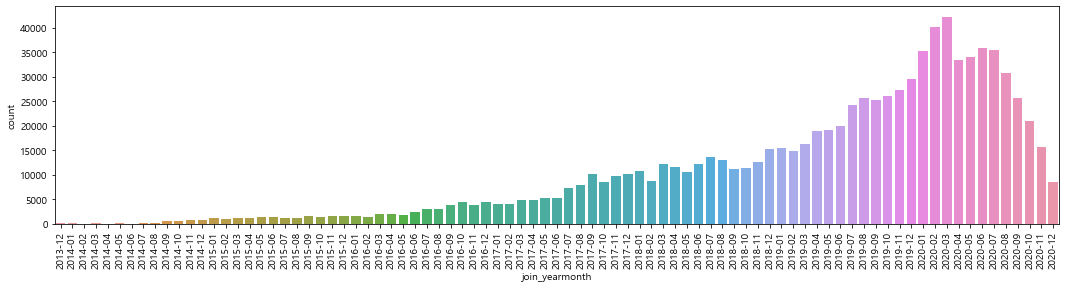

In [27]:
# 2020년 결제내역이 있는 유저의 가입연월 분포
plt.figure(figsize = (18,4))
plt.xticks(rotation = 90)
sns.barplot(x = df_join_date['join_yearmonth'], y = df_join_date['count'])

## date(사용일) 기준

In [28]:
df_date = df.groupby('date')['count', 'pay_yearmonth'].agg({
    'count' : 'sum', 'pay_yearmonth' : 'max'}).reset_index()
df_date

<ipython-input-28-ba4d8eac5e68>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_date = df.groupby('date')['count', 'pay_yearmonth'].agg({


,date,count,pay_yearmonth
0,2020-01-01,929,2020-01
1,2020-01-02,1507,2020-01
2,2020-01-03,1751,2020-01
3,2020-01-04,2217,2020-01
4,2020-01-05,1517,2020-01
...,...,...,...
361,2020-12-27,1292,2020-12
362,2020-12-28,2773,2020-12
363,2020-12-29,2803,2020-12
364,2020-12-30,2879,2020-12


<AxesSubplot:xlabel='pay_yearmonth', ylabel='count'>

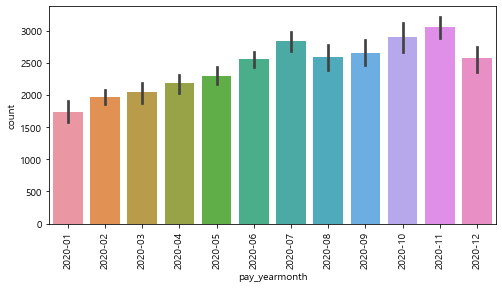

In [29]:
# 2020년 결제건수 분포
# 2020년에는 지속적으로 결제건수가 증가하는 추세에서 8,9,12월은 감소하였음
plt.figure(figsize = (8,4))
plt.xticks(rotation = 90)
sns.barplot(x = df_date['pay_yearmonth'], y = df_date['count'])

## store_id 기준

In [30]:
# 총 1060개의 store_id
df_store_id = df.groupby('store_id')['count'].sum().reset_index().sort_values(by = 'count',ascending = False)
df_store_id

,store_id,count
513,220557,17772
611,220893,17540
532,220655,16787
142,92437,16300
602,220848,16298
...,...,...
930,230196,1
926,230190,1
463,220018,1
922,228955,1


In [31]:
# 결제가 많았던 top 20개 store_id 대상으로 추가 분석
df_store_id_list = df_store_id.head(20)['store_id'].tolist()
df_store_id_list

[220557,
 220893,
 220655,
 92437,
 220848,
 105033,
 91853,
 1109,
 82400,
 109037,
 173268,
 220836,
 220745,
 182296,
 220897,
 221045,
 28018,
 109557,
 90542,
 109400]

In [32]:
top_stores = df[df['store_id'].isin(df_store_id_list)].groupby(['store_id','d_type','goods_type','ad1'])['count'].count().reset_index()
top_stores

,store_id,d_type,goods_type,ad1,count
0,1109,AA,A,JRR,7720
1,1109,AA,D,JRR,750
2,1109,BB,A,JRR,5064
3,1109,BB,D,JRR,494
4,1109,CC,A,JRR,4
...,...,...,...,...,...
120,221045,AA,A,GN,4555
121,221045,AA,B,GN,682
122,221045,BB,A,GN,3404
123,221045,BB,B,GN,534


<AxesSubplot:xlabel='d_type', ylabel='count'>

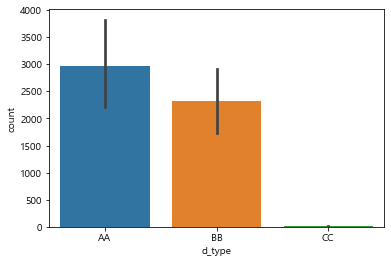

In [33]:
# top 20 store의 d_type은 AA가 가장 많고 CC가 가장 적음
plt.figure(figsize = (6,4))
sns.barplot(x = top_stores['d_type'], y = top_stores['count'])

<AxesSubplot:xlabel='goods_type', ylabel='count'>

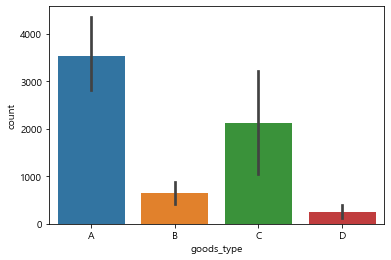

In [34]:
# top 20 store의 goods_type은 A가 가장 많고 D가 가장 적음
plt.figure(figsize = (6,4))
sns.barplot(x = top_stores['goods_type'].sort_values(), y = top_stores['count'])

<AxesSubplot:xlabel='ad1', ylabel='count'>

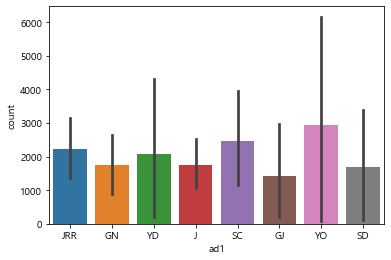

In [35]:
# top 20 store의 ad1은 YO가 가장 많음
plt.figure(figsize = (6,4))
sns.barplot(x = top_stores['ad1'], y = top_stores['count'])

## dtype 기준

In [36]:
df_dtype = df.groupby('d_type')['count'].sum().reset_index()
df_dtype

,d_type,count
0,AA,503976
1,BB,391700
2,CC,1244


<AxesSubplot:xlabel='d_type', ylabel='count'>

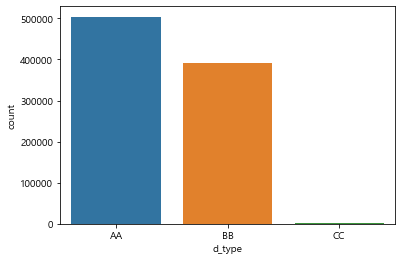

In [37]:
# AA 타입이 가장 높은 비율을 차지
plt.figure(figsize = (6,4))
sns.barplot(x = df_dtype['d_type'], y = df_dtype['count'])

## goods_type 기준

In [38]:
df_goods = df.groupby('goods_type')['count'].sum().reset_index()
df_goods

,goods_type,count
0,A,621745
1,B,120279
2,C,134641
3,D,20255


<AxesSubplot:xlabel='goods_type', ylabel='count'>

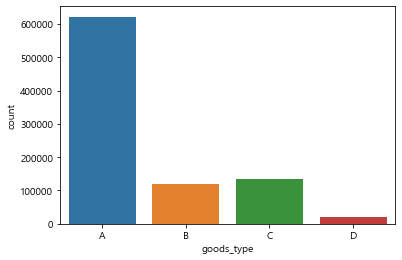

In [39]:
# A 타입이 가장 높은 비율을 차지
plt.figure(figsize = (6,4))
sns.barplot(x = df_goods['goods_type'], y = df_goods['count'])

## ad1 기준

In [40]:
df_ad1 = df.groupby('ad1')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
df_ad1

,ad1,count
49,J,182743
39,GN,176880
51,JRR,129467
63,SC,77272
52,MP,68893
...,...,...
70,SP,3
71,VO,1
54,NW,1
41,GR,1


<AxesSubplot:xlabel='ad1', ylabel='count'>

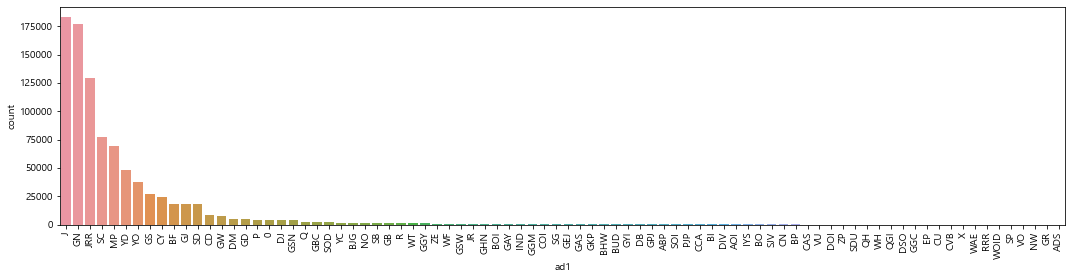

In [41]:
# G, GN이 가장 많은 비율을 차지 -> 지역을 나타내는 표기일 것으로 추정됨
plt.figure(figsize = (18,4))
plt.xticks(rotation = 90)
sns.barplot(x = df_ad1['ad1'], y = df_ad1['count'], order = df_ad1['ad1'])

## dayofweek(요일) 기준

In [42]:
df_dow = df.groupby('pay_dow')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
df_dow

,pay_dow,count
0,Friday,140614
4,Thursday,136152
6,Wednesday,134931
2,Saturday,134483
5,Tuesday,133258
1,Monday,129460
3,Sunday,88022


<AxesSubplot:xlabel='pay_dow', ylabel='count'>

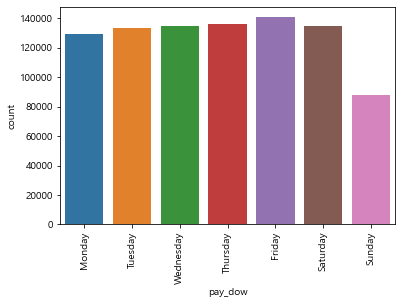

In [43]:
# 요일별 이용자수 : 목~금요일이 가장 많으며, 일요일이 가장 적음
plt.figure(figsize = (6,4))
plt.xticks(rotation = 90)
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = df_dow['pay_dow'], y = df_dow['count'], order = dow_order)

# 심층 EDA


## top users
- 결제건수 상위 20명 유저를 대상으로 컬럼별 특징 살펴보기

In [44]:
df_user

,user_id,count
100780,1514190,284
16448,591610,245
90226,1467323,239
76229,1355841,235
62808,1224426,223
...,...,...
81384,1402020,1
81383,1402008,1
81382,1401999,1
81379,1401974,1


In [45]:
# 결제건수 상위 20명 유저
top_users_list = df_user['user_id'].head(20).unique()
top_users_list

array([1514190,  591610, 1467323, 1355841, 1224426, 1365069, 1407916,
       1284291, 1144500,  909315, 1504815, 1201981,  571472,  612237,
       1532535,  640247, 1303371, 1318771,  603013,  812843], dtype=int64)

In [46]:
top_users = df[df['user_id'].isin(top_users_list)].sort_values(by = 'user_id').reset_index()
top_users

,index,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,201736,571472,2017-08-03,AA,92437,B,2020-04-16,1,J,2017-08,2020-04,Thursday
1,396617,571472,2017-08-03,AA,92437,B,2020-07-07,1,J,2017-08,2020-07,Tuesday
2,47103,571472,2017-08-03,AA,92437,B,2020-01-29,1,J,2017-08,2020-01,Wednesday
3,399238,571472,2017-08-03,AA,92437,B,2020-07-08,1,J,2017-08,2020-07,Wednesday
4,401921,571472,2017-08-03,AA,92437,B,2020-07-09,1,J,2017-08,2020-07,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
3831,374559,1532535,2020-03-31,BB,219913,A,2020-06-28,1,GN,2020-03,2020-06,Sunday
3832,691068,1532535,2020-03-31,BB,219913,A,2020-10-25,1,GN,2020-03,2020-10,Sunday
3833,688109,1532535,2020-03-31,BB,219913,A,2020-10-24,1,GN,2020-03,2020-10,Saturday
3834,360975,1532535,2020-03-31,BB,219913,B,2020-06-23,1,GN,2020-03,2020-06,Tuesday


In [47]:
# dtype : 각 유저당 하나의 dtype을 가짐
# 결제수단일 것으로 추정됨
for user in top_users_list:
  df_top = top_users.copy()
  d_type = df_top[df_top['user_id'] == user]['d_type'].unique()
  print(d_type)

['AA']
['AA']
['AA']
['AA']
['BB']
['AA']
['AA']
['AA']
['AA']
['BB']
['AA']
['BB']
['AA']
['AA']
['BB']
['BB']
['AA']
['AA']
['AA']
['AA']


In [48]:
# goods_type : 유저마다 다양한 goods_type 정보를 가짐
# 구매한 티켓 종류일 것으로 추정됨 (1일권, 3시간권 등)
for user in top_users_list:
  df_top = top_users.copy()
  inputs = df_top[df_top['user_id'] == user]['goods_type'].unique()
  print(inputs)

['A' 'B' 'C']
['A' 'C']
['B' 'A']
['A']
['A' 'B']
['A']
['A' 'B' 'D' 'C']
['A' 'B' 'C']
['A']
['A']
['A']
['A']
['B' 'A' 'C']
['A']
['A' 'B']
['A' 'C']
['A' 'D']
['A' 'D']
['A' 'B']
['C' 'A']


In [49]:
# ad1 : 유저마다 다양한 ad1 정보를 가짐
# 지역 분류일 것으로 추정됨
for user in top_users_list:
  df_top = top_users.copy()
  inputs = df_top[df_top['user_id'] == user]['ad1'].unique()
  print(inputs)

['GN' 'GS']
['JRR']
['JRR']
['GJ']
['J' 'YO']
['GJ']
['J' 'JRR']
['GJ' 'MP' 'JRR']
['JRR']
['SC']
['GN']
['GN']
['J' 'JRR' 'SD']
['MP']
['GN']
['CY']
['JRR']
['CY']
['JRR']
['GN' 'J']


## top stores
- 결제건수 상위 20개 store 대상으로 컬럼별 특징 살펴보기

In [50]:
# 결제건수 상위 20개 store
top_stores_list = df.groupby('store_id')['count'].sum().sort_values(ascending = False).reset_index().head(20)['store_id'].tolist()
top_stores_list

[220557,
 220893,
 220655,
 92437,
 220848,
 105033,
 91853,
 1109,
 82400,
 109037,
 173268,
 220836,
 220745,
 182296,
 220897,
 221045,
 28018,
 109557,
 90542,
 109400]

In [51]:
top_stores = df[df['store_id'].isin(top_stores_list)].sort_values(by = 'store_id').reset_index()
top_stores

,index,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,pay_yearmonth,pay_dow
0,111088,1362090,2019-10-22,AA,1109,A,2020-03-02,1,JRR,2019-10,2020-03,Monday
1,789688,1537966,2020-04-08,AA,1109,A,2020-11-26,1,JRR,2020-04,2020-11,Thursday
2,146865,1071619,2019-02-20,BB,1109,A,2020-03-20,1,JRR,2019-02,2020-03,Friday
3,146867,1071768,2019-02-20,AA,1109,A,2020-03-20,1,JRR,2019-02,2020-03,Friday
4,789703,1541986,2020-04-14,AA,1109,A,2020-11-26,1,JRR,2020-04,2020-11,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
246444,851642,1697046,2020-09-20,AA,221045,A,2020-12-20,1,GN,2020-09,2020-12,Sunday
246445,417396,1570996,2020-05-16,AA,221045,A,2020-07-14,1,GN,2020-05,2020-07,Tuesday
246446,277348,1434158,2019-12-17,AA,221045,A,2020-05-20,1,GN,2019-12,2020-05,Wednesday
246447,779441,485337,2017-03-21,AA,221045,B,2020-11-23,1,GN,2017-03,2020-11,Monday


In [52]:
# dtype : 스토어마다 다양한 dtype 정보를 가짐
for store in top_stores_list:
  df_top = top_stores.copy()
  d_type = df_top[df_top['store_id'] == store]['d_type'].unique()
  print(d_type)

['AA' 'BB' 'CC']
['BB' 'AA' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB' 'CC']
['BB' 'AA' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB' 'CC']
['BB' 'AA' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB' 'CC']
['BB' 'AA' 'CC']
['AA' 'BB' 'CC']
['BB' 'AA' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB' 'CC']
['AA' 'BB']


In [53]:
# goods_type : 스토어마다 다양한 goods_type 정보를 가짐
for store in top_stores_list:
  df_top = top_stores.copy()
  goods_type = df_top[df_top['store_id'] == store]['goods_type'].unique()
  print(goods_type)

['A' 'D']
['B' 'A' 'C']
['A' 'B']
['A' 'B' 'C']
['C' 'B']
['A' 'B']
['A' 'D' 'B']
['A' 'D']
['B' 'A']
['A' 'B' 'D']
['A' 'D' 'B']
['A' 'B']
['A' 'B']
['A' 'B']
['B' 'A']
['A' 'B']
['C' 'B']
['A' 'B']
['A' 'B' 'D']
['C' 'A' 'B']


In [54]:
# ad1 : 각 스토어당 하나의 ad1 정보를 가짐
for store in top_stores_list:
  df_top = top_stores.copy()
  ad1 = df_top[df_top['store_id'] == store]['ad1'].unique()
  print(ad1)

['YO']
['J']
['JRR']
['J']
['GN']
['SC']
['YD']
['JRR']
['JRR']
['J']
['J']
['JRR']
['SD']
['SC']
['J']
['GN']
['JRR']
['GJ']
['GN']
['J']


# 외부 데이터 활용

## 기상 데이터

In [55]:
# 기상정보 데이터셋 불러오기
climate = pd.read_csv('서울시_기상데이터.csv', encoding = 'cp949')
climate

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0
...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,NaN,4.8,54,NaN,NaN,-6.5,2.2
8756,108,2020-12-30 21:00,-12.4,NaN,3.2,58,NaN,NaN,-6.9,2.2
8757,108,2020-12-30 22:00,-12.7,NaN,2.8,56,NaN,NaN,-7.1,2.1
8758,108,2020-12-30 23:00,-12.9,NaN,2.2,54,NaN,NaN,-7.3,2.1


In [56]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      8760 non-null   int64  
 1   일시      8760 non-null   object 
 2   기온      8759 non-null   float64
 3   강수량     1059 non-null   float64
 4   풍속      8760 non-null   float64
 5   습도      8760 non-null   int64  
 6   일조시간    4791 non-null   float64
 7   적설량     208 non-null    float64
 8   지면온도    8752 non-null   float64
 9   지중온도    8748 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 684.5+ KB


In [57]:
# 날짜컬럼 생성
climate['날짜'] = climate['일시'].apply(lambda x : x[:10])
climate

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,날짜
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2,2020-01-01
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1,2020-01-01
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1,2020-01-01
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0,2020-01-01
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,NaN,4.8,54,NaN,NaN,-6.5,2.2,2020-12-30
8756,108,2020-12-30 21:00,-12.4,NaN,3.2,58,NaN,NaN,-6.9,2.2,2020-12-30
8757,108,2020-12-30 22:00,-12.7,NaN,2.8,56,NaN,NaN,-7.1,2.1,2020-12-30
8758,108,2020-12-30 23:00,-12.9,NaN,2.2,54,NaN,NaN,-7.3,2.1,2020-12-30


In [58]:
climate_grouped = climate.groupby('날짜')['기온','강수량','습도'].agg({'기온':['min','max'],
                                           '강수량':'max',
                                           '습도':'max'})
climate_grouped.columns = [a + '_' + b for a, b in climate_grouped.columns]
climate_grouped

<ipython-input-58-0df0aaa8ae9b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  climate_grouped = climate.groupby('날짜')['기온','강수량','습도'].agg({'기온':['min','max'],


,기온_min,기온_max,강수량_max,습도_max
날짜,,,,
2020-01-01,-5.9,0.3,0.1,76
2020-01-02,-0.7,3.8,NaN,74
2020-01-03,-3.3,4.3,NaN,86
2020-01-04,-2.7,6.1,NaN,64
2020-01-05,-3.1,6.5,NaN,61
...,...,...,...,...
2020-12-27,1.4,9.9,0.0,77
2020-12-28,4.3,11.0,1.3,91
2020-12-29,-5.5,4.2,0.2,85


In [59]:
# 강수량 NaN값인 경우 0으로, 강수량 값이 존재하는 경우 1로 대체하여 binary 변수로 활용
climate_grouped.loc[climate_grouped['강수량_max'].isnull(), '강수량_max'] = 0
climate_grouped.loc[climate_grouped['강수량_max'].notnull(), '강수량_max'] = 1
climate_grouped

,기온_min,기온_max,강수량_max,습도_max
날짜,,,,
2020-01-01,-5.9,0.3,1.0,76
2020-01-02,-0.7,3.8,1.0,74
2020-01-03,-3.3,4.3,1.0,86
2020-01-04,-2.7,6.1,1.0,64
2020-01-05,-3.1,6.5,1.0,61
...,...,...,...,...
2020-12-27,1.4,9.9,1.0,77
2020-12-28,4.3,11.0,1.0,91
2020-12-29,-5.5,4.2,1.0,85


In [62]:
climate_merge = climate_grouped.reset_index()
climate_merge.columns = ['date', 'temp_min', 'temp_max', 'rain', 'humidity']
climate_merge['date'] = climate_merge['date'].apply(lambda X : pd.to_datetime(X))
df_merge = df.groupby('date')['count'].agg('sum').reset_index()

df_climate = climate_merge.merge(df_merge, how = 'outer', on = 'date')
df_climate

,date,temp_min,temp_max,rain,humidity,count
0,2020-01-01,-5.9,0.3,1.0,76,929
1,2020-01-02,-0.7,3.8,1.0,74,1507
2,2020-01-03,-3.3,4.3,1.0,86,1751
3,2020-01-04,-2.7,6.1,1.0,64,2217
4,2020-01-05,-3.1,6.5,1.0,61,1517
...,...,...,...,...,...,...
361,2020-12-27,1.4,9.9,1.0,77,1292
362,2020-12-28,4.3,11.0,1.0,91,2773
363,2020-12-29,-5.5,4.2,1.0,85,2803
364,2020-12-30,-12.9,-6.2,1.0,63,2879


<AxesSubplot:title={'center':'기상 변수와의 상관성 분석'}>

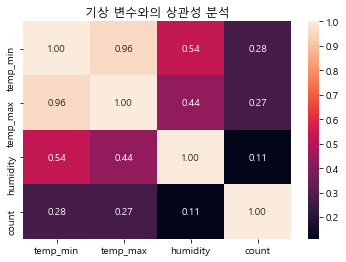

In [63]:
# count 변수와의 상관관계는 temp_min > temp_max > humidity 순
df_climate_heatmap = df_climate[['temp_min', 'temp_max', 'humidity', 'count']]

plt.figure(figsize=(6, 4))
plt.title('기상 변수와의 상관성 분석')
sns.heatmap(df_climate_heatmap.corr(), annot=True, fmt='.2f')

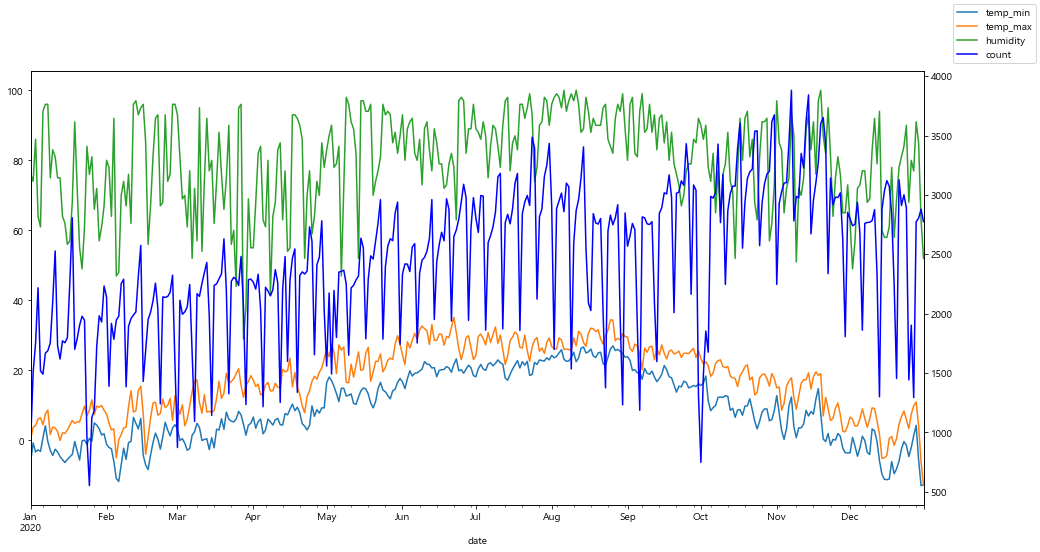

In [64]:
ax = df_climate.plot(x="date", y=['temp_min', 'temp_max', 'humidity'], legend=False, figsize=(16,8))
ax2 = ax.twinx()
df_climate.plot(x="date", y="count", ax=ax2, legend=False, color="b")
ax.figure.legend()
plt.show()

In [65]:
# df 데이터셋에 기상 관련 변수 추가
df = df.merge(df_climate, how = 'outer', on = 'date').drop('count_y', axis = 1)
df

,user_id,join_date,d_type,store_id,goods_type,date,count_x,ad1,join_yearmonth,pay_yearmonth,pay_dow,temp_min,temp_max,rain,humidity
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014-01,2020-01,Wednesday,-5.9,0.3,1.0,76
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-02,2020-01,Wednesday,-5.9,0.3,1.0,76
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2020-01,Wednesday,-5.9,0.3,1.0,76
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2020-01,Wednesday,-5.9,0.3,1.0,76
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2020-01,Wednesday,-5.9,0.3,1.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878900,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020-12,2020-12,Thursday,-12.7,-12.7,1.0,52
878901,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020-12,2020-12,Thursday,-12.7,-12.7,1.0,52
878902,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020-12,2020-12,Thursday,-12.7,-12.7,1.0,52
878903,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020-12,2020-12,Thursday,-12.7,-12.7,1.0,52


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878905 entries, 0 to 878904
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         878905 non-null  int64         
 1   join_date       878905 non-null  datetime64[ns]
 2   d_type          878905 non-null  object        
 3   store_id        878905 non-null  int64         
 4   goods_type      878905 non-null  object        
 5   date            878905 non-null  datetime64[ns]
 6   count_x         878905 non-null  int64         
 7   ad1             878905 non-null  object        
 8   join_yearmonth  878905 non-null  object        
 9   pay_yearmonth   878905 non-null  object        
 10  pay_dow         878905 non-null  object        
 11  temp_min        878905 non-null  float64       
 12  temp_max        878905 non-null  float64       
 13  rain            878905 non-null  float64       
 14  humidity        878905 non-null  int

# 모델을 통한 예측 - by rows

## 1회만 결제한 유저

### 제외한 버전

In [ ]:
# # 사용 이력이 1회인 유저 onetime_user_list에 저장 
# onetime_user_list = df_user.loc[df_user['count']==1, 'user_id'].to_list()

In [ ]:
# df_model = df[~df['user_id'].isin(onetime_user_list)]
# df_model

### 제외하지 않은 버전

In [67]:
# df_model 데이터셋 만들고 모델 예측에 필요한 컬럼만 남기기
df_model = df.copy().rename(columns = {'count_x' : 'count'})
df_model = df_model.drop(['store_id', 'date', 'join_yearmonth', 'pay_yearmonth'], axis = 1)
df_model

,user_id,join_date,d_type,goods_type,count,ad1,pay_dow,temp_min,temp_max,rain,humidity
0,2858,2014-01-07,AA,A,1,GN,Wednesday,-5.9,0.3,1.0,76
1,5647,2014-02-14,BB,A,1,J,Wednesday,-5.9,0.3,1.0,76
2,33314,2014-11-20,BB,A,1,SC,Wednesday,-5.9,0.3,1.0,76
3,37001,2014-12-04,BB,C,1,MP,Wednesday,-5.9,0.3,1.0,76
4,37819,2014-12-07,AA,C,1,JRR,Wednesday,-5.9,0.3,1.0,76
...,...,...,...,...,...,...,...,...,...,...,...
878900,1830551,2020-12-31,BB,B,1,GN,Thursday,-12.7,-12.7,1.0,52
878901,1830570,2020-12-31,BB,B,1,CY,Thursday,-12.7,-12.7,1.0,52
878902,1830580,2020-12-31,AA,B,1,JRR,Thursday,-12.7,-12.7,1.0,52
878903,1830589,2020-12-31,BB,B,1,J,Thursday,-12.7,-12.7,1.0,52


In [68]:
# 범주형 변수 컬럼 cat_columns로 구분
cat_columns = [c for c, t in zip(df_model.dtypes.index, df_model.dtypes) if t == 'O'] 
num_columns = [c for c in df_model.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n\n Other Columns: \n{num_columns}')

Categorical Columns: 
['d_type', 'goods_type', 'ad1', 'pay_dow']

 Other Columns: 
['user_id', 'join_date', 'count', 'temp_min', 'temp_max', 'rain', 'humidity']


## train, test set 나누기

In [69]:
# train set (2020-01 ~ 2020-09)
df_train = df_model[df_model['join_date'] <= '2020-09-30']
df_train

,user_id,join_date,d_type,goods_type,count,ad1,pay_dow,temp_min,temp_max,rain,humidity
0,2858,2014-01-07,AA,A,1,GN,Wednesday,-5.9,0.3,1.0,76
1,5647,2014-02-14,BB,A,1,J,Wednesday,-5.9,0.3,1.0,76
2,33314,2014-11-20,BB,A,1,SC,Wednesday,-5.9,0.3,1.0,76
3,37001,2014-12-04,BB,C,1,MP,Wednesday,-5.9,0.3,1.0,76
4,37819,2014-12-07,AA,C,1,JRR,Wednesday,-5.9,0.3,1.0,76
...,...,...,...,...,...,...,...,...,...,...,...
878180,1708309,2020-09-29,AA,A,1,YD,Thursday,-12.7,-12.7,1.0,52
878181,1709129,2020-09-29,AA,A,1,YD,Thursday,-12.7,-12.7,1.0,52
878182,1709507,2020-09-30,AA,A,1,MP,Thursday,-12.7,-12.7,1.0,52
878183,1710045,2020-09-30,BB,A,1,J,Thursday,-12.7,-12.7,1.0,52


In [70]:
# test set (2020-10 ~ 2020-12) 
df_test = df_model[df_model['join_date'] > '2020-09-30']
df_test

,user_id,join_date,d_type,goods_type,count,ad1,pay_dow,temp_min,temp_max,rain,humidity
623969,1710117,2020-10-01,BB,A,1,JRR,Thursday,15.7,23.4,1.0,90
623970,1710156,2020-10-01,AA,A,1,SC,Thursday,15.7,23.4,1.0,90
623971,1710172,2020-10-01,AA,A,1,YO,Thursday,15.7,23.4,1.0,90
623972,1710174,2020-10-01,AA,A,1,JRR,Thursday,15.7,23.4,1.0,90
623973,1710176,2020-10-01,AA,A,1,JRR,Thursday,15.7,23.4,1.0,90
...,...,...,...,...,...,...,...,...,...,...,...
878900,1830551,2020-12-31,BB,B,1,GN,Thursday,-12.7,-12.7,1.0,52
878901,1830570,2020-12-31,BB,B,1,CY,Thursday,-12.7,-12.7,1.0,52
878902,1830580,2020-12-31,AA,B,1,JRR,Thursday,-12.7,-12.7,1.0,52
878903,1830589,2020-12-31,BB,B,1,J,Thursday,-12.7,-12.7,1.0,52


In [71]:
x_train = df_train.drop(['count', 'join_date'], axis = 1)
x_test = df_test.drop(['count', 'join_date'], axis = 1)
y_train = df_train['count']
y_test = df_test['count']

## 전처리 함수

In [72]:
# 원핫인코딩 전처리함수
from sklearn.preprocessing import OneHotEncoder

def onehotencoding(x_train, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_test  = x_test.copy()
    
    # reset index
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)
    
    # cat_columns 원핫인코딩
    ohe = OneHotEncoder(sparse=False)
    x_all = pd.concat([tmp_x_train[cat_columns], 
                       tmp_x_test[cat_columns]], axis=0)

    new_x_all = ohe.fit_transform(x_all)
    
    ohe_columns = []
    for cat in ohe.categories_:
        ohe_columns += cat.tolist()
    
    new_x_all = pd.DataFrame(new_x_all, columns=ohe_columns)

    new_x_train_cat = new_x_all.iloc[:tmp_x_train.shape[0], :]
    new_x_test_cat =  new_x_all.iloc[tmp_x_train.shape[0]:, :]

    new_x_train_cat = new_x_train_cat.reset_index(drop=True)
    new_x_test_cat  = new_x_test_cat.reset_index(drop=True)

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
    return tmp_x_train, tmp_x_test

In [73]:
# 라벨인코딩 전처리함수
from sklearn.preprocessing import LabelEncoder

def labelencoding(x_train, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_test  = x_test.copy()
    
    # reset index
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)

    # cat_columns 라벨인코딩
    le = LabelEncoder()
    x_all = pd.concat([tmp_x_train[cat_columns], tmp_x_test[cat_columns]], axis=0)
    new_x_all = x_all.apply(LabelEncoder().fit_transform)
    
    new_x_train_cat = new_x_all.iloc[:tmp_x_train.shape[0], :]
    new_x_test_cat =  new_x_all.iloc[tmp_x_train.shape[0]:, :]

    new_x_train_cat = new_x_train_cat.reset_index(drop=True)
    new_x_test_cat  = new_x_test_cat.reset_index(drop=True)

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
    return tmp_x_train, tmp_x_test

In [74]:
# 범주형 변수 라벨인코딩 진행
x_train, x_test = labelencoding(x_train, x_test)

In [75]:
x_train

,user_id,temp_min,temp_max,rain,humidity,d_type,goods_type,ad1,pay_dow
0,2858,-5.9,0.3,1.0,76,0,0,39,6
1,5647,-5.9,0.3,1.0,76,1,0,49,6
2,33314,-5.9,0.3,1.0,76,1,0,63,6
3,37001,-5.9,0.3,1.0,76,1,2,52,6
4,37819,-5.9,0.3,1.0,76,0,2,51,6
...,...,...,...,...,...,...,...,...,...
834893,1708309,-12.7,-12.7,1.0,52,0,0,80,4
834894,1709129,-12.7,-12.7,1.0,52,0,0,80,4
834895,1709507,-12.7,-12.7,1.0,52,0,0,52,4
834896,1710045,-12.7,-12.7,1.0,52,1,0,49,4


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'temp_min'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'d_type'}>],
       [<AxesSubplot:title={'center':'goods_type'}>,
        <AxesSubplot:title={'center':'ad1'}>,
        <AxesSubplot:title={'center':'pay_dow'}>]], dtype=object)

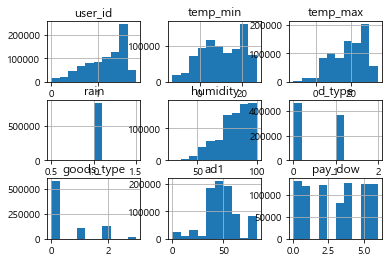

In [76]:
x_train.hist()

In [77]:
x_test

,user_id,temp_min,temp_max,rain,humidity,d_type,goods_type,ad1,pay_dow
0,1710117,15.7,23.4,1.0,90,1,0,51,4
1,1710156,15.7,23.4,1.0,90,0,0,63,4
2,1710172,15.7,23.4,1.0,90,0,0,81,4
3,1710174,15.7,23.4,1.0,90,0,0,51,4
4,1710176,15.7,23.4,1.0,90,0,0,51,4
...,...,...,...,...,...,...,...,...,...
44002,1830551,-12.7,-12.7,1.0,52,1,1,39,4
44003,1830570,-12.7,-12.7,1.0,52,1,1,19,4
44004,1830580,-12.7,-12.7,1.0,52,0,1,51,4
44005,1830589,-12.7,-12.7,1.0,52,1,1,49,4


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'temp_min'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'d_type'}>],
       [<AxesSubplot:title={'center':'goods_type'}>,
        <AxesSubplot:title={'center':'ad1'}>,
        <AxesSubplot:title={'center':'pay_dow'}>]], dtype=object)

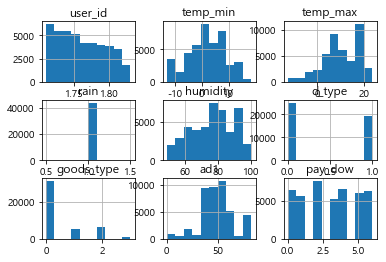

In [78]:
x_test.hist()

## 모델 생성

In [296]:
# 트리계열 모델인 RandomForest, XGBoost, LightGBM 모델 성능 비교
# MAE 기준 가장 좋은 성능을 내는 모델 : LightGBM

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = [['RandomForest', RandomForestRegressor()], 
          ['XGBoost', XGBRegressor(n_jobs=-1)], 
          ['LightGBM', LGBMRegressor(n_jobs=-1)]]

best_loss = np.inf
for i, (name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    current_loss = mean_absolute_error(y_test, y_pred)
    
    if current_loss < best_loss:
        best_loss  = current_loss
        best_model = [i, name, model]
    
    print(f'{name} Model Mean Absolute Error: {best_loss}')
    
print(f'Best Model: {best_model[-2]}, MAE : {best_loss}')

RandomForest Model Mean Absolute Error: 0.26704751516804154
XGBoost Model Mean Absolute Error: 0.07785486182999204
LightGBM Model Mean Absolute Error: 0.05439728393253674
Best Model: LightGBM, MAE : 0.05439728393253674


In [79]:
# 트리계열 모델인 RandomForest, XGBoost, LightGBM 모델 성능 비교
# MSE 기준 가장 좋은 성능을 내는 모델 : LightGBM

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = [['RandomForest', RandomForestRegressor()], 
          ['XGBoost', XGBRegressor(n_jobs=-1)], 
          ['LightGBM', LGBMRegressor(n_jobs=-1)]]

best_loss = np.inf
for i, (name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    current_loss = mean_squared_error(y_test, y_pred)
    
    if current_loss < best_loss:
        best_loss  = current_loss
        best_model = [i, name, model]
    
    print(f'{name} Model Mean Squared Error: {best_loss}')
    
print(f'Best Model: {best_model[-2]}, MSE : {best_loss}')

RandomForest Model Mean Squared Error: 0.1614234190015225
XGBoost Model Mean Squared Error: 0.05592749467720873
LightGBM Model Mean Squared Error: 0.04875105840370154
Best Model: LightGBM, MSE : 0.04875105840370154


## 하이퍼 파라미터 튜닝

In [85]:
# 성능이 가장 좋았던 LightGBM 모델로 하이퍼 파라미터 튜닝 진행
from sklearn.model_selection import GridSearchCV

params = {'num_leaves':[25, 30],
          'max_depth' : [3]}

lgbm_tuning = GridSearchCV(best_model[-1], params, n_jobs= -1, scoring='neg_mean_absolute_error')
lgbm_tuning.fit(x_train, y_train)

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3], 'num_leaves': [25, 30]},
             scoring='neg_mean_absolute_error')

In [84]:
# 1차 : 위 모델보다 개선된 MAE
# params = {'num_leaves':[30],
#           'max_depth' : [3, 4]}

print('GridSearchCV best MAE score : {:.4f}, best_params : {}'.format(-lgbm_tuning.best_score_, lgbm_tuning.best_params_))

GridSearchCV best MAE score : 0.0399, best_params : {'max_depth': 3, 'num_leaves': 30}


In [86]:
# 2차 : 1차와 동일한 결과
# params = {'num_leaves':[25, 30],
#           'max_depth' : [3]}

print('GridSearchCV best MAE score : {:.4f}, best_params : {}'.format(-lgbm_tuning.best_score_, lgbm_tuning.best_params_))

GridSearchCV best MAE score : 0.0399, best_params : {'max_depth': 3, 'num_leaves': 25}
